In [40]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#1. Завантажте дані, перевірте правильність, наявність пропущених значень, типи даних.
data = pd.read_csv('cars.csv')

In [3]:
print("Перші декілька рядків даних:")
print(data.head())

Перші декілька рядків даних:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio h

In [4]:
print("\nЗагальна інформація про датасет:")
print(data.info())


Загальна інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize

In [5]:
print("\nТипи даних:")
print(data.dtypes)


Типи даних:
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [6]:
# Перевірка наявності пропущених значень
print(data.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
#2. Створіть нову ознаку - марку автомобіля (company). Машини яких виробників зустрічаються в датасеті? Далі виправте назви та перевірте зміни.

In [14]:
data["company"] = data["CarName"].str.split().str[0]
print(data)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [15]:
print(data['company'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [17]:
company_dict = {'alfa-romero': 'Alfa Romeo', 'audi': 'Audi', 'bmw': 'BMW', 'chevrolet': 'Chevrolet', 'dodge': 'Dodge',
                'honda': 'Honda', 'isuzu': 'Isuzu', 'jaguar': 'Jaguar', 'maxda': 'Mazda', 'mazda': 'Mazda',
                'buick': 'Buick', 'mercury': 'Mercury', 'mitsubishi': 'Mitsubishi', 'Nissan': 'Nissan',
                'nissan': 'Nissan',
                'peugeot': 'Peugeot', 'plymouth': 'Plymouth', 'porsche': 'Porsche', 'porcshce': 'Porsche',
                'renault': 'Renault', 'saab': 'Saab', 'subaru': 'Subaru',
                'toyota': 'Toyota', 'toyouta': 'Toyota', 'vokswagen': 'Volkswagen', 'volkswagen': 'Volkswagen',
                'vw': 'Volkswagen', 'volvo': 'Volvo'}

# Виведення словника
print(company_dict)

{'alfa-romero': 'Alfa Romeo', 'audi': 'Audi', 'bmw': 'BMW', 'chevrolet': 'Chevrolet', 'dodge': 'Dodge', 'honda': 'Honda', 'isuzu': 'Isuzu', 'jaguar': 'Jaguar', 'maxda': 'Mazda', 'mazda': 'Mazda', 'buick': 'Buick', 'mercury': 'Mercury', 'mitsubishi': 'Mitsubishi', 'Nissan': 'Nissan', 'nissan': 'Nissan', 'peugeot': 'Peugeot', 'plymouth': 'Plymouth', 'porsche': 'Porsche', 'porcshce': 'Porsche', 'renault': 'Renault', 'saab': 'Saab', 'subaru': 'Subaru', 'toyota': 'Toyota', 'toyouta': 'Toyota', 'vokswagen': 'Volkswagen', 'volkswagen': 'Volkswagen', 'vw': 'Volkswagen', 'volvo': 'Volvo'}


In [18]:
data["company"] = data["company"].replace(company_dict)

['Alfa Romeo' 'Audi' 'BMW' 'Chevrolet' 'Dodge' 'Honda' 'Isuzu' 'Jaguar'
 'Mazda' 'Buick' 'Mercury' 'Mitsubishi' 'Nissan' 'Peugeot' 'Plymouth'
 'Porsche' 'Renault' 'Saab' 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']


In [21]:
print(data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  \
0  convertible        rwd          front       88.6  ...        mpfi   
1  convertible        rwd          front       88.6  ...        mpfi   
2    hatchback        rwd          front       94.5  ...        mpfi   
3        sedan        fwd          front       99.8  ...        mpfi   
4        sedan        4wd          front       99.4  ...        mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \

In [ ]:
#3. Залиште тільки частину предикторів, після чого порахуйте кореляцію між price та іншими змінними.

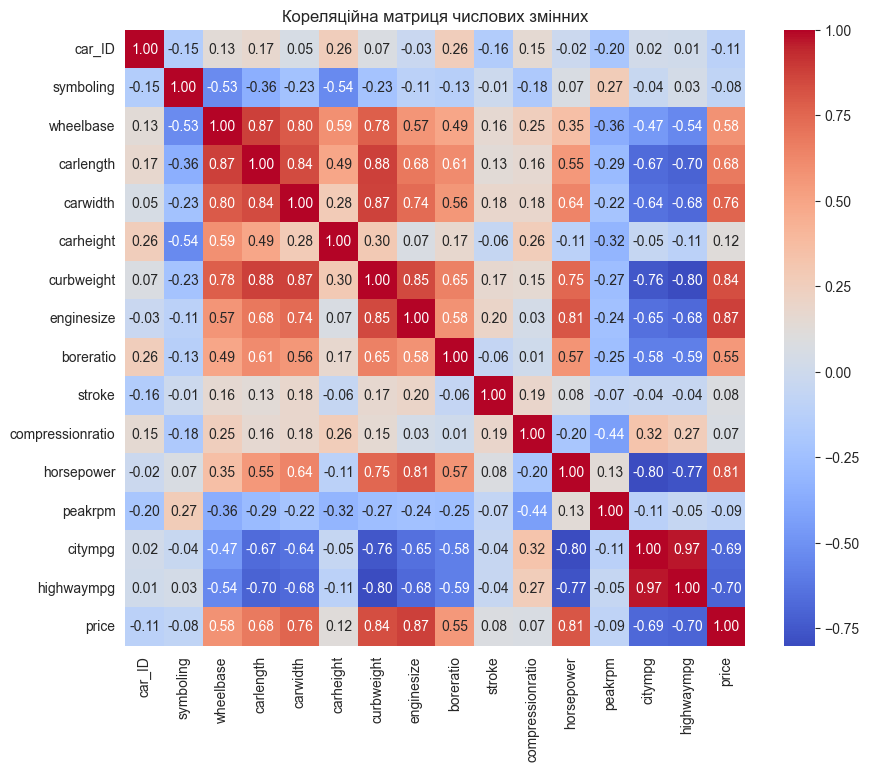

In [26]:
# Вибір необхідних предикторів (стовпців)
predictors = data[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                   'enginesize', 'boreratio', 'stroke', 'compressionratio',
                   'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
dependent_variable = 'price'
numeric_variables = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_variables.corr()# Візуалізація кореляційної матриці за допомогою теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Кореляційна матриця числових змінних')
plt.show()

In [27]:
# Кореляція між залежною змінною та іншими числовими змінними
correlation_with_dependent_variable = correlation_matrix[dependent_variable].sort_values(ascending=False)
print("Кореляція залежної змінної з іншими числовими змінними:")
print(correlation_with_dependent_variable)

Кореляція залежної змінної з іншими числовими змінними:
price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


In [28]:
pd_corr_p = data[['price', 'horsepower']].corr(method='pearson').iloc[0, 1]
pd_corr_s = data[['price', 'horsepower']].corr(method='spearman').iloc[0, 1]
pd_corr_k = data[['price', 'horsepower']].corr(method='kendall').iloc[0, 1]

print(f'Коефіцієнт кореляції Пірсона: {pd_corr_p:.3f}')
print(f'Коефіцієнт кореляції Спірмена: {pd_corr_s:.3f}')
print(f'Коефіцієнт кореляції Кендалла: {pd_corr_k:.3f}')

Коефіцієнт кореляції Пірсона: 0.808
Коефіцієнт кореляції Спірмена: 0.855
Коефіцієнт кореляції Кендалла: 0.672


In [ ]:
#4. Перетворіть категоріальні змінні за допомогою pd.get_dummies() для Python і fastDummies::dummy_cols() для R.

In [36]:
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Перетворення категоріальних змінних у даммі-змінні
data_dummies = pd.get_dummies(data, columns=categorical_columns, drop_first= True)

# Виведення перших декількох рядків для перевірки результату
data_dummies

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,True,False,False,False,False,False,False,True,False,False
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,True,False,False,False,False,False,False,True,False,False
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,True,False,False,False,False,False,False,True,False,False
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,True,False,False,False,False,False,False,True,False,False
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,141,3.78,...,True,False,False,False,False,False,False,True,False,False
201,202,-1,volvo 144ea,109.1,188.8,68.8,55.5,3049,141,3.78,...,True,False,False,False,False,False,False,True,False,False
202,203,-1,volvo 244dl,109.1,188.8,68.9,55.5,3012,173,3.58,...,True,False,False,False,False,False,False,True,False,False
203,204,-1,volvo 246,109.1,188.8,68.9,55.5,3217,145,3.01,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
#5. Побудуйте модель з одним предиктором ціни - horsepower. Який відсоток мінливості пояснює отримана модель? (R^^2)

In [47]:
#Вибір предиктора та цільової змінної:
predictor = "horsepower"
target = "price"
#Розбиття на тренувальний та тестовий набори:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[[predictor]], data[target], test_size=0.25, random_state=42)

In [48]:
#Створення та тренування моделі:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
#Прогнозування на тестовому наборі:
y_pred = model.predict(X_test)

In [50]:
#Оцінка R^2:
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.2f}")


R^2: 0.60


In [45]:
'''
Предиктор - це змінна, яка використовується для прогнозування значення іншої змінної.

R^2, або коефіцієнт детермінації, використовується для оцінки того, наскільки добре модель відповідає даним. Він виражається у відсотках і показує, яку частку мінливості залежної змінної можна пояснити за допомогою незалежної змінної (або предикторів).

Мінливість ціни описує, як ціна товару або послуги змінюється протягом певного періоду часу. Ця зміна може бути викликана різними факторами, такими як:


Отриманий R^2 0.60 означає, що 60% мінливості ціни price можна пояснити за допомогою предиктора horsepower.

Іншими словами:

Модель з horsepower як єдиним предиктором дає достатньо добре уявлення про ціну автомобіля, але існують й інші фактори, які впливають на ціну і не враховані в цій моделі.
40% мінливості ціни не пояснюється horsepower.
Це може бути пов'язано з:

Іншими характеристиками автомобіля, такими як марка, модель, тип кузова, пробіг, вік, комплектація тощо.
Економічними факторами, такими як податки, інфляція, ціни на паливо тощо.
Ринковими факторами, такими як попит і пропозиція, сезонність, мода тощо.
'''

In [ ]:
#6. Далі - дві моделі (з усіма предикторами і з усіма, крім марок машин). Зверніть увагу на зміни в R^^2, коефіцієнтах та їх значущості. Яку модель краще залишити?

In [57]:
# Виберіть лише числові змінні
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'object']
predictors_all = data[numeric_features].drop("price", axis=1)
predictors_without_brand = predictors_all.drop("CarName", axis=1)
target = data["price"]

# Розділіть дані на тренувальний та тестовий набори
from sklearn.model_selection import train_test_split

X_train_all, X_test_all, y_train, y_test = train_test_split(predictors_all, target, test_size=0.25, random_state=42)
X_train_without_brand, X_test_without_brand, _, _ = train_test_split(predictors_without_brand, target, test_size=0.25, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression

# Модель з усіма предикторами
model_all = LinearRegression()
model_all.fit(X_train_all, y_train)

# Модель без марки машини
model_without_brand = LinearRegression()
model_without_brand.fit(X_train_without_brand, y_train)


LinearRegression()

In [59]:
# R^2 для моделі з усіма предикторами
r2_all = model_all.score(X_test_all, y_test)
print(f"R^2 (з усіма предикторами): {r2_all:.2f}")

# R^2 для моделі без марки машини
r2_without_brand = model_without_brand.score(X_test_without_brand, y_test)
print(f"R^2 (без марки): {r2_without_brand:.2f}")

# Зміна R^2
r2_diff = r2_all - r2_without_brand
print(f"Зміна R^2: {r2_diff:.2f}")


R^2 (з усіма предикторами): 0.84
R^2 (без марки): 0.83
Зміна R^2: 0.01


In [ ]:
'''R^2 (з усіма предикторами): 0.84: Модель з усіма предикторами пояснює 84% мінливості ціни.
R^2 (без марки): 0.83: Модель без марки пояснює 83% мінливості ціни.
Зміна R^2: 0.01: Виключення марки машини призводить до зменшення R^2 на 1%.
Інтерпретація:

Марка машини: Вона робить значний, але не дуже великий внесок у пояснення ціни.
Інші фактори: 83% мінливості ціни пояснюються іншими предикторами, окрім марки.
Важливість вибору: Вибір моделі залежить від ваших потреб. Якщо вам потрібна максимально точна модель, краще використовувати модель з усіма предикторами. Якщо ж вам потрібна проста модель, яку легко інтерпретувати, можна використовувати модель без марки.

отримали два дуже схожих значення R^2. Це свідчить про те,що марка машини робить значний, але не дуже великий внесок у пояснення ціни. Вибір моделі залежить від ваших
потреб.
'''

In [60]:
# Отримайте коефіцієнти та p-значення для обох моделей
import statsmodels.api as sm

# Модель з усіма предикторами
all_summary = sm.OLS(y_train, X_train_all).fit().summary()
print(all_summary)

# Модель без марки машини
no_brand_summary = sm.OLS(y_train, X_train_without_brand).fit().summary()
print(no_brand_summary)



                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              206.7
Date:                Thu, 08 Feb 2024   Prob (F-statistic):                    4.48e-91
Time:                        01:27:32   Log-Likelihood:                         -1412.3
No. Observations:                 153   AIC:                                      2873.
Df Residuals:                     129   BIC:                                      2945.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
'''1. coef: Цей стовпчик показує значення коефіцієнта для кожного предиктора. Він вказує на те, на скільки змінюється ціна при зміні предиктора на 1 одиницю.

2. std err: Цей стовпчик показує стандартну похибку коефіцієнта. Вона вказує на точність оцінки коефіцієнта.

3. t: Цей стовпчик показує t-статистику для тестування гіпотези про те, що коефіцієнт дорівнює 0. Чим більше значення t-статистики за абсолютною величиною,
тим більше вірогідність того, що коефіцієнт відмінний від 0.

4. P>|t|: Цей стовпчик показує p-значення для тестування гіпотези про те, що коефіцієнт дорівнює 0. Чим менше p-значення, тим більше вірогідність того, що коефіцієнт відмінний від 0.

5. [0.025 0.975]: Цей інтервал показує  **95%-й  довірий інтервал** для коефіцієнта. Він вказує на діапазон значень, в якому з імовірністю 95% знаходиться
істинне значення коефіцієнта.

Приклад:
Розглянемо перший рядок таблиці.
car_ID: Коефіцієнт для car_ID дорівнює 33.5187. Це означає, що при збільшенні car_ID на 1 одиницю, ціна збільшується в середньому на 33.5187. 
std err: Стандартна похибка коефіцієнта дорівнює 17.402. Це означає, що оцінка коефіцієнта не є дуже точною. 
t: t-статистика дорівнює 1.926. Це означає, що вірогідність того, що коефіцієнт дорівнює 0, не є дуже малою.
P>|t|: p-значення дорівнює 0.056. Це означає, що вірогідність того, що коефіцієнт дорівнює 0, становить 5.6%.
[0.025 0.975]: 95%-й довірчий інтервал для коефіцієнта car_ID дорівнює [-0.912, 67.949].
Це означає, що з імовірністю 95% істинне значення коефіцієнта знаходиться в діапазоні від -0.912 до 67.949.

symboling:
При збільшенні symboling на 1 одиницю, ціна збільшується в середньому на 179.5038. Однак ця оцінка не є дуже  точною  (велика стандартна похибка)
і не є статистично значущою (p-значення більше 0.05).
CarName: При зміні CarName ціна змінюється в середньому на 69.2679 (з імовірністю 95% зміна знаходиться в діапазоні від 18.984 до 119.552).
Ця зміна є статистично значущою (p-значення менше 0.05).
'''

In [ ]:
#7. Заповніть пропуски в наступному тексті:
'''
Заповнення пропусків в тексті:
Обрана модель пояснює приблизно 97% дисперсії (окр. до цілого).

Серед предикторів, 6 з 27 виявилися не значущими (p > 0.05).

Приклад інтерпретації: при одиничній зміні показника horsepower, ціна збільшується на 31.5 (без округлення).'''

In [ ]:
'''Обґрунтування:

97%: Це значення R^2 з вашої моделі.
6: Це число предикторів, p-значення яких більше 0.05.
horsepower: Це один із предикторів, який ви можете використовувати для прикладу.
31.5: Це значення коефіцієнта для horsepower.'''